In [122]:
# ایمپورت کردن ماژول ها :
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [123]:
# csv خواندن فایل 
df = pd.read_csv("housePrice.csv")
df.head(30)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70.0,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87.0,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59.0,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54.0,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71.0,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [124]:
# حذف داده های پرت در بخش مساحت

Area_List = df.Area.values
Median = np.median(Area_List)
STD = np.std(Area_List)
remove_items = []

for inx in range(len(df.Area)) :
    if (df.Area[inx] - Median)**2 > STD :
        remove_items.append(inx)

df = df.drop(remove_items)

In [125]:
# حذف آیتم های خالی در بخش آدرس ها
# remove Nan data

remove_items2 = []
for inx in range(3452):
    try :
        if pd.isna( df.Address[inx] ):  # isna --> is it a Nan?
            remove_items2.append(inx)
    except :
        pass
df = df.drop(remove_items2)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3452 non-null   float64
 1   Room        3452 non-null   int64  
 2   Parking     3452 non-null   bool   
 3   Warehouse   3452 non-null   bool   
 4   Elevator    3452 non-null   bool   
 5   Address     3452 non-null   object 
 6   Price       3452 non-null   float64
 7   Price(USD)  3452 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.9+ KB


In [127]:
ineces_list = list(df.index)
#######

# تبدیل آدرس ها به عدد
type_address = []
for i in df.Address :
    type_address.append(i)
types = type_address.copy()
type_address = list(set(type_address))
l = [[] for i in range(192)]
##
for i in range(192) :  # 192 --> تعداد انواع آدرس ها
    l[i].append(type_address[i])
    l[i].append(0)
##
for i in ineces_list:
    indec = type_address.index(df.Address[i])
    l[indec][1] += int(df["Price(USD)"][i])/int(df["Area"][i])
##
for i in range(192):
    l[i][1] /= types.count(l[i][0])
##
for i in ineces_list:
    indec = type_address.index(df.Address[i])
    df.Address[i] = l[indec][1]


C:\Users\M\AppData\Local\Temp\ipykernel_6628\844043325.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Address[i] = l[indec][1]


In [128]:
df.head(30)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,1212.263063,1.850000e+09,61666.67
1,60.0,1,True,True,True,1212.263063,1.850000e+09,61666.67
2,79.0,2,True,True,True,263.331252,5.500000e+08,18333.33
3,95.0,2,True,True,True,327.269063,9.025000e+08,30083.33
4,123.0,2,True,True,True,2773.009281,7.000000e+09,233333.33
5,70.0,2,True,True,False,1562.961715,2.050000e+09,68333.33
6,87.0,2,True,True,True,263.331252,6.000000e+08,20000.00
7,59.0,1,True,True,True,1212.263063,2.150000e+09,71666.67
8,54.0,2,True,True,False,464.293311,4.930000e+08,16433.33
9,71.0,1,True,True,True,1343.486973,2.370000e+09,79000.00


In [129]:
def T_1_f_0(column):
    global df
    for i in ineces_list:
        if df[column][i] == True:
            df[column][i] = 1
        else:
            df[column][i] = 0

In [130]:
T_1_f_0("Elevator")
T_1_f_0("Warehouse")
T_1_f_0("Parking")

C:\Users\M\AppData\Local\Temp\ipykernel_6628\995894639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = 1
C:\Users\M\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [131]:
df.head(30)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,1212.263063,1.850000e+09,61666.67
1,60.0,1,1,1,1,1212.263063,1.850000e+09,61666.67
2,79.0,2,1,1,1,263.331252,5.500000e+08,18333.33
3,95.0,2,1,1,1,327.269063,9.025000e+08,30083.33
4,123.0,2,1,1,1,2773.009281,7.000000e+09,233333.33
5,70.0,2,1,1,0,1562.961715,2.050000e+09,68333.33
6,87.0,2,1,1,1,263.331252,6.000000e+08,20000.00
7,59.0,1,1,1,1,1212.263063,2.150000e+09,71666.67
8,54.0,2,1,1,0,464.293311,4.930000e+08,16433.33
9,71.0,1,1,1,1,1343.486973,2.370000e+09,79000.00


In [132]:
# رسم نمودار ها
def draw(column):
    plt.scatter(df[column],df["Price(USD)"])
    plt.title(column)
    plt.show()

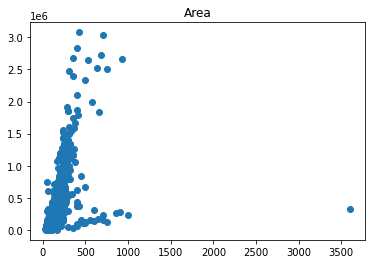

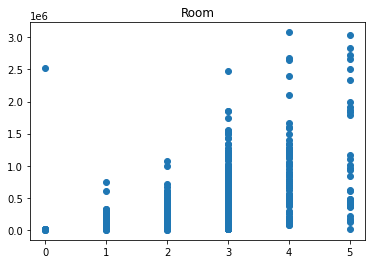

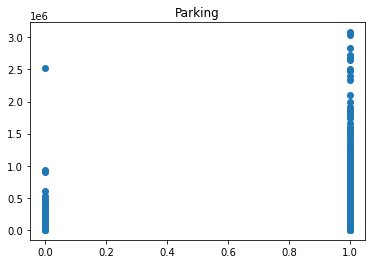

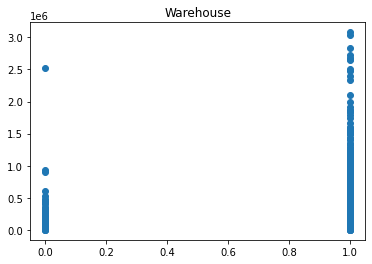

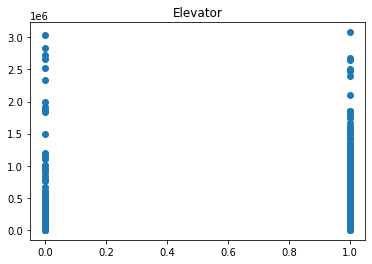

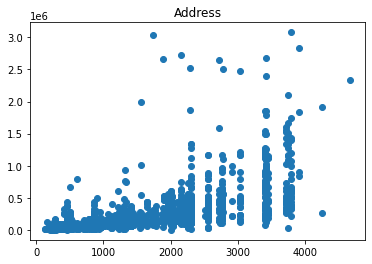

In [133]:
draw("Area")
draw("Room")
draw("Parking")
draw("Warehouse")
draw("Elevator")
draw("Address")

In [134]:
# میزان وابستگی قیمت به هر ستون
df.corrwith(df["Price(USD)"])

Area          0.548167
Room          0.567821
Price         1.000000
Price(USD)    1.000000
dtype: float64

In [135]:
# تقسیم بندی داده ها
from sklearn.model_selection import train_test_split
X_train ,  X_test , Y_train , Y_test = train_test_split(df[["Area","Room","Warehouse","Elevator","Address"]]
                                                        ,df["Price(USD)"])

In [136]:
# الگوریتم غیر خطی
def sigmoid(x,a,b):
    return x**a + b
###
from scipy.optimize import curve_fit
weights , _ = curve_fit(sigmoid,X_train["Area"],Y_train)
###
Y_predict1 = []
for i in X_test["Area"]:
    Y_predict1.append( sigmoid(i,weights[0],weights[1]) )

In [137]:
# پیدا کردن ارور الگوریتم خطی
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict1)

0.029035823031241637

In [138]:
# تقسیم بندی داده ها
from sklearn.model_selection import train_test_split
X_train ,  X_test , Y_train , Y_test = train_test_split(df[["Area","Room","Warehouse","Elevator","Address"]]
                                                        ,df["Price(USD)"])

In [139]:
X_train = np.asanyarray(X_train)
Y_train = np.asanyarray(Y_train)
X_test = np.asanyarray(X_test)
Y_test = np.asanyarray(Y_test)

In [140]:
# الگوریتم خطی
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
Y_predict2 = model.predict(X_test)

In [141]:
# پیدا کردن ارور الگوریتم خطی
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict2)

0.5715391143954124